In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_ROOT_FOLDER =  "../data"

In [2]:
# Read from the csv file
df_db = pd.read_csv(f"{DATA_ROOT_FOLDER}/processed/ds_X_train_interpolated.csv",engine="pyarrow", delimiter="\t")
df_db.head()

,WebPriceId,DateObserve,StockStatus,CurrentPrice
0,112,2021-01-12 07:38:39.433,InStock,574.0
1,112,2021-01-19 18:45:36.000,InStock,643.0
2,112,2021-01-25 18:39:09.000,InStock,603.0
3,112,2021-01-28 10:46:26.487,InStock,608.0
4,112,2021-02-01 18:56:03.000,InStock,597.0


In [3]:
df_db.head()

,WebPriceId,DateObserve,StockStatus,CurrentPrice
0,112,2021-01-12 07:38:39.433,InStock,574.0
1,112,2021-01-19 18:45:36.000,InStock,643.0
2,112,2021-01-25 18:39:09.000,InStock,603.0
3,112,2021-01-28 10:46:26.487,InStock,608.0
4,112,2021-02-01 18:56:03.000,InStock,597.0


In [4]:
df_db.nunique()

WebPriceId       32905
DateObserve     603377
StockStatus          2
CurrentPrice     43245
dtype: int64

In [5]:
df_db.groupby("StockStatus").count()

,WebPriceId,DateObserve,CurrentPrice
StockStatus,,,
InStock,2710456,2710456,2710456
OutOfStock,129339,129339,0


In [6]:
df_db.groupby("WebPriceId").count().shape[0]


32905

In [7]:
# Get data from the time period till x
def get_data_from_period(df, x):
    return df.loc[df["DateObserve"] <= x]

get_data_from_period(df_db, "2022-01-01").head(140)

,WebPriceId,DateObserve,StockStatus,CurrentPrice
0,112,2021-01-12 07:38:39.433,InStock,574.0
1,112,2021-01-19 18:45:36.000,InStock,643.0
2,112,2021-01-25 18:39:09.000,InStock,603.0
3,112,2021-01-28 10:46:26.487,InStock,608.0
4,112,2021-02-01 18:56:03.000,InStock,597.0
...,...,...,...,...
187,132,2021-10-17 13:02:23.000,InStock,669.0
188,132,2021-10-21 13:03:48.000,InStock,712.0
189,132,2021-10-22 13:07:42.000,InStock,760.0
190,132,2021-10-23 13:05:46.000,InStock,764.0


122


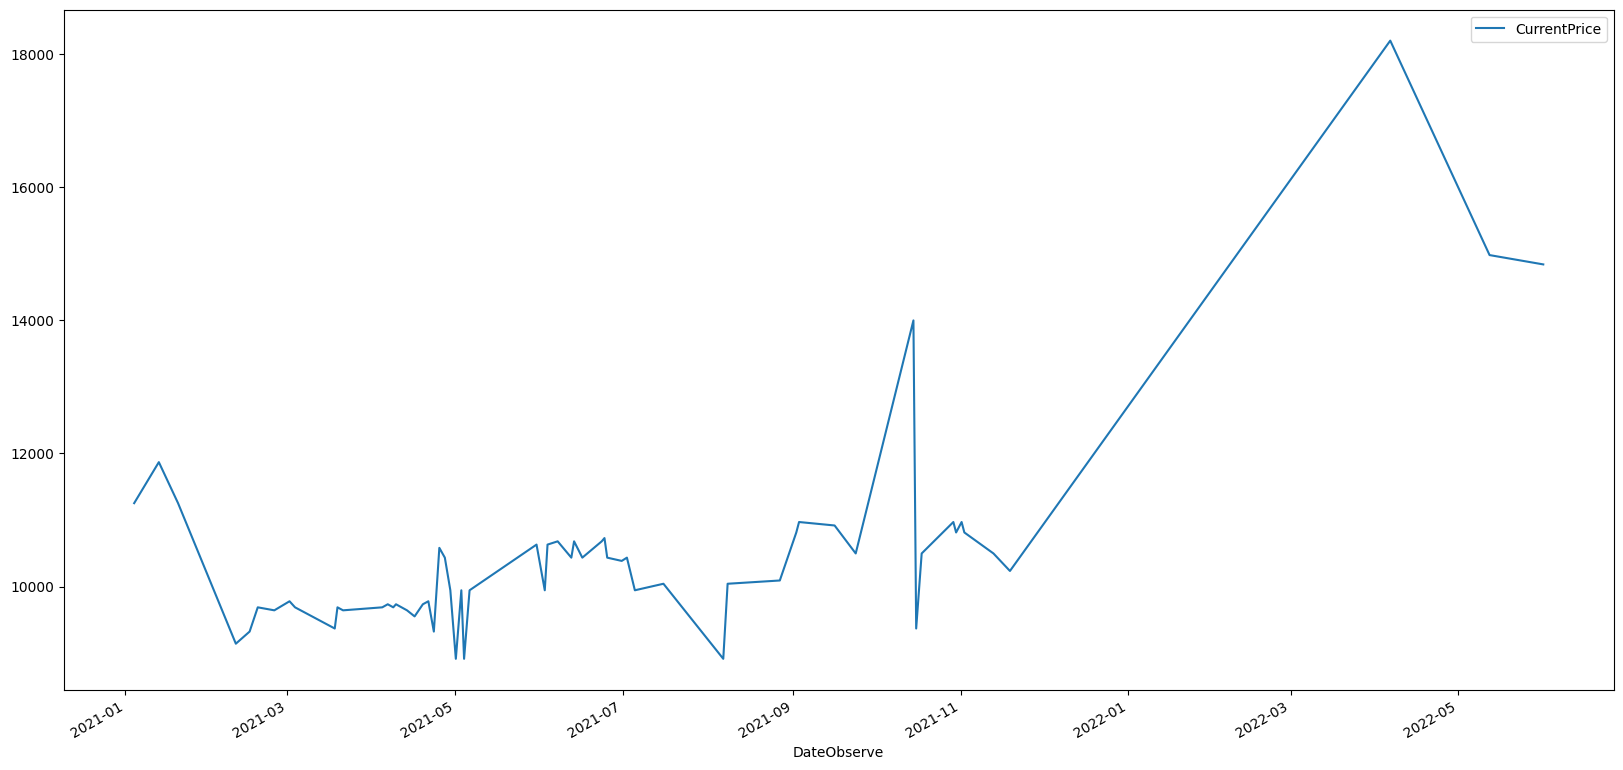

In [8]:
# plot df_db["WebPriceId" == 5804972]
id_item = 1968908	
print(len(df_db.loc[df_db["WebPriceId"] == id_item]))
sample = df_db.loc[df_db["WebPriceId"] == id_item][:]
sample.plot(x="DateObserve", y="CurrentPrice", figsize=(20,10))
plt.show()

In [9]:
print(df_db.loc[df_db["WebPriceId"] == id_item].sort_values(by="DateObserve")[-50:])

         WebPriceId         DateObserve StockStatus  CurrentPrice
1581749     1968908 2021-06-24 09:51:57     InStock       10730.0
233891      1968908 2021-06-24 09:51:57     InStock       10730.0
233892      1968908 2021-06-25 09:51:53     InStock       10436.0
1581750     1968908 2021-06-25 09:51:53     InStock       10436.0
1581751     1968908 2021-06-30 16:27:29     InStock       10387.0
233893      1968908 2021-06-30 16:27:29     InStock       10387.0
233894      1968908 2021-07-02 13:48:34     InStock       10436.0
1581752     1968908 2021-07-02 13:48:34     InStock       10436.0
1581753     1968908 2021-07-05 11:14:49     InStock        9946.0
233895      1968908 2021-07-05 11:14:49     InStock        9946.0
1581754     1968908 2021-07-15 20:46:57     InStock       10044.0
233896      1968908 2021-07-15 20:46:57     InStock       10044.0
1581755     1968908 2021-08-06 15:06:35     InStock        8917.0
233897      1968908 2021-08-06 15:06:35     InStock        8917.0
233898    

In [10]:
df_db.shape

(2839795, 4)

In [11]:
df_db.dropna(inplace=True)

In [12]:
df_db.shape


(2710456, 4)

In [13]:
df_db.groupby("WebPriceId").count().shape[0]

32905

<AxesSubplot:xlabel='DateObserve'>

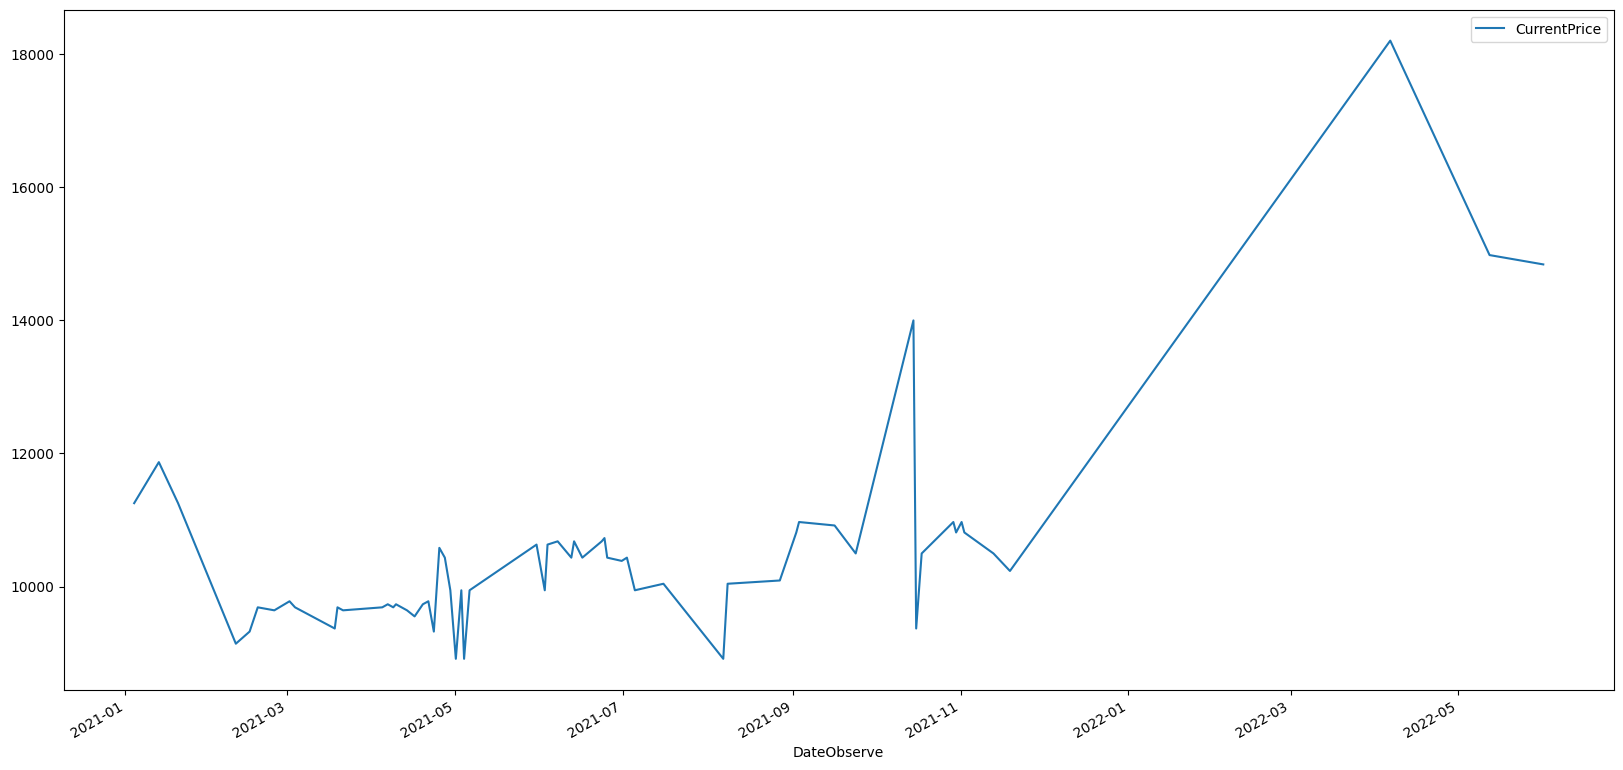

In [14]:
# Forecast next 30 days for df_db.loc[df_db["WebPriceId"] == id_item]
# https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

price_data = df_db.loc[df_db["WebPriceId"] == id_item]
price_data = price_data.sort_values(by="DateObserve")
# Plot 
price_data.plot(x="DateObserve", y="CurrentPrice", figsize=(20,10))

<AxesSubplot:xlabel='DateObserve'>

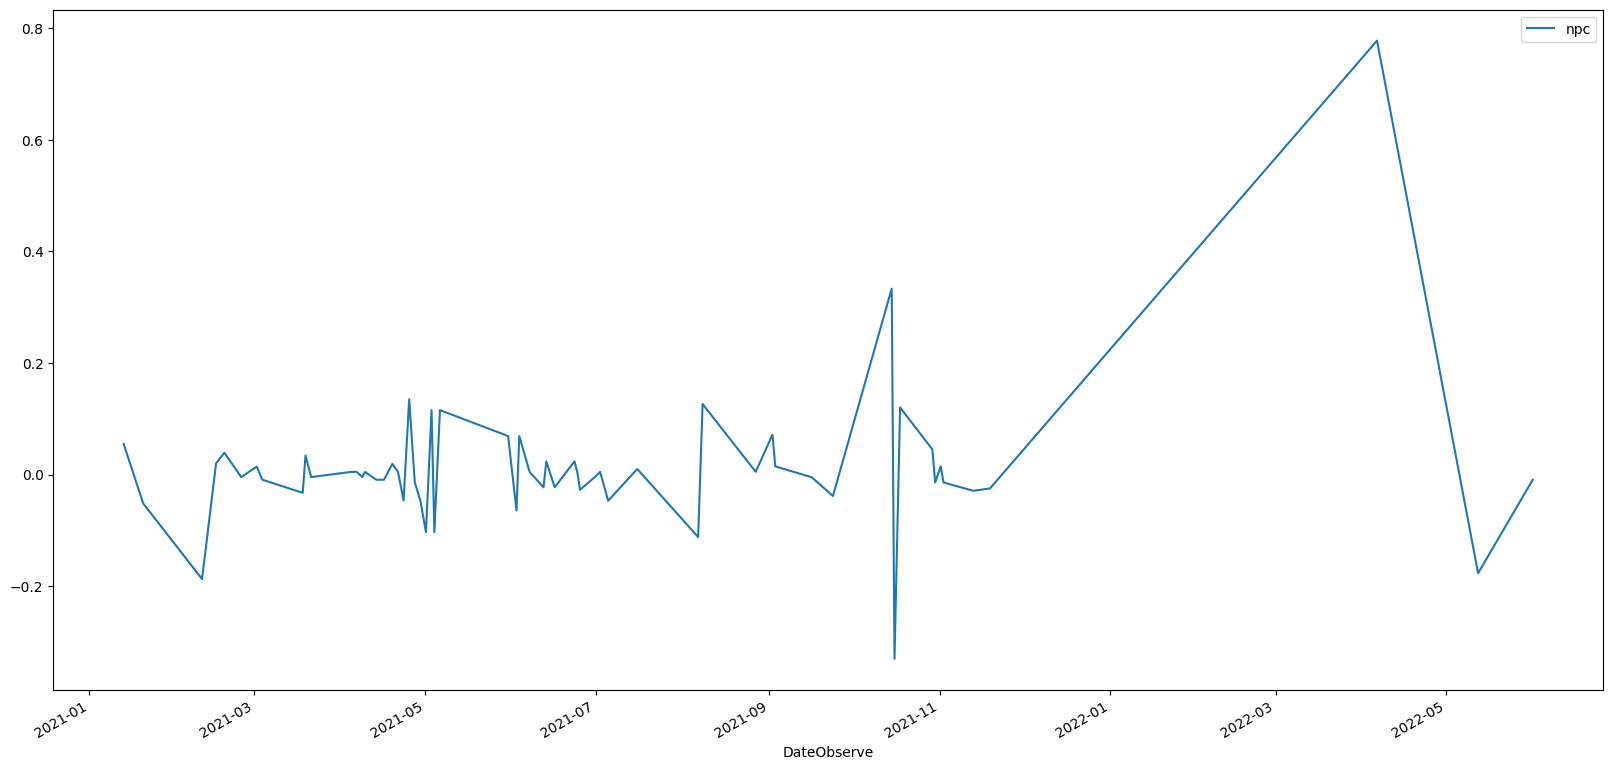

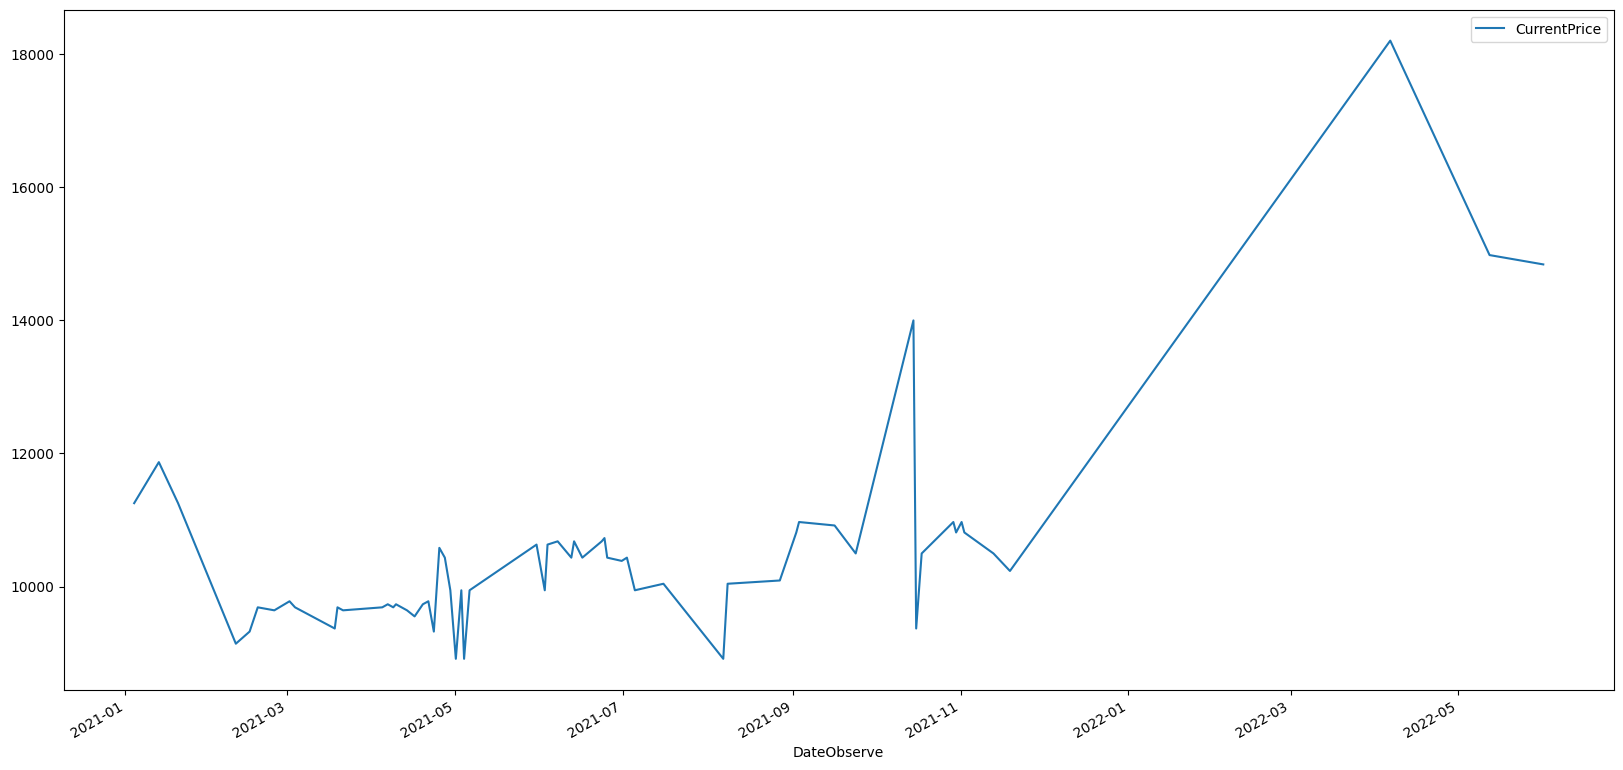

In [15]:
# Get lagged series
def get_lagged_series(df, lag=1):
    df_taken = df.copy()
    for i in range(1, lag+1):
        df_taken[f"lag_{i}"] = df_taken["CurrentPrice"].shift(i)
    return df_taken


price_data['npc'] = price_data["CurrentPrice"] / price_data["CurrentPrice"].shift(2) - 1

# plot npc and current price in two graphs
price_data.plot(x="DateObserve", y=["npc"], figsize=(20,10))
price_data.plot(x="DateObserve", y=["CurrentPrice"], figsize=(20,10))


In [16]:
def get_last_n_days(df, n=30):
    # Get last n days
    # Input: df - dataframe with DateObserve column
    #        n - number of days to get
    # Output: df - dataframe with last n days
    if n ==0:
        return df
    return df.loc[df["DateObserve"] >= df["DateObserve"].max() - pd.Timedelta(days=n)]

def trim_NaN(df):
    # Trim NaN values from the beginning and the end of the dataframe
    # Input: df - dataframe
    # Output: df - dataframe without NaN values
    return df.loc[df["npc"].notna()]

d = get_last_n_days(price_data, 50)
trim_NaN(d)

,WebPriceId,DateObserve,StockStatus,CurrentPrice,npc
1581772,1968908,2022-05-12 09:59:47,InStock,14979.0,-0.176933
233914,1968908,2022-05-12 09:59:47,InStock,14979.0,-0.176933
233915,1968908,2022-05-31 22:52:25,InStock,14839.0,-0.009346
1581773,1968908,2022-05-31 22:52:25,InStock,14839.0,-0.009346


/home/quakumei/.conda/envs/py39/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


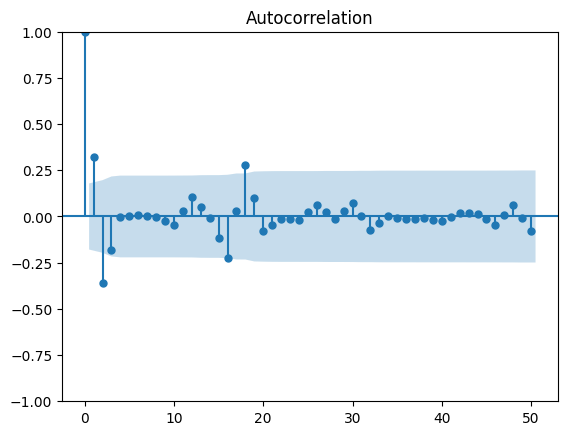

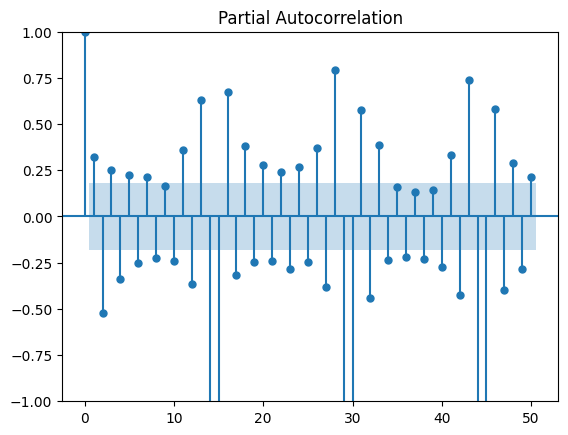

In [17]:
# Build ACF and PACF plots for npc
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(trim_NaN(price_data)["npc"], lags=50)
plot_pacf(trim_NaN(price_data)["npc"], lags=50)
plt.show()


In [18]:
# Build autoregression model for the last 30 days
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

# Get last 30 days
d = get_last_n_days(price_data, 30)
# Trim NaN values
d = trim_NaN(d)
# Set DateObserve as index
d = d.set_index("DateObserve")
d = d.reset_index()
d = d.drop(columns=["WebPriceId", "StockStatus"])

field_to_predict = "npc"
print(d[field_to_predict])
# Train AutoReg model
model = (ARIMA(d[field_to_predict])).fit()
# Make prediction
yhat = model.predict(len(d), len(d))
print(yhat)


0   -0.176933
1   -0.176933
2   -0.009346
3   -0.009346
Name: npc, dtype: float64
4   -0.093145
dtype: float64


In [19]:
# Predict npc for item with specified webpriceid
def predict_npc_for_item(df, webpriceid, field_to_predict="npc", n=0):
    # Predict npc for the last day in the series based on the last n days
    # Input: df - dataframe with DateObserve column
    #        webpriceid - id of the item
    #        field_to_predict - field to predict
    #        n - number of days to use for prediction
    # Output: yhat - predicted value
    #         model - trained model
    #         d - dataframe with last n days
    #         df - dataframe with last n days
    df_taken = df.loc[df["WebPriceId"] == webpriceid].copy()
    if field_to_predict == "npc":
        df_taken['npc'] = df_taken["CurrentPrice"] / df_taken["CurrentPrice"].shift(2) - 1
    return predict_npc_for_series(df_taken, field_to_predict, n)


yhat, model, d, df_taken = predict_npc_for_item(df_db, 1968908, field_to_predict="npc", n=30)
yhat

NameError: name 'predict_npc_for_series' is not defined

In [ ]:
d

,DateObserve,CurrentPrice,npc
0,2022-05-12 09:59:47,14979.0,0.463365
1,2022-05-31 22:52:25,14839.0,-0.184626
2,2022-05-12 09:59:47,14979.0,0.463365
3,2022-05-31 22:52:25,14839.0,-0.184626


<AxesSubplot:xlabel='DateObserve'>

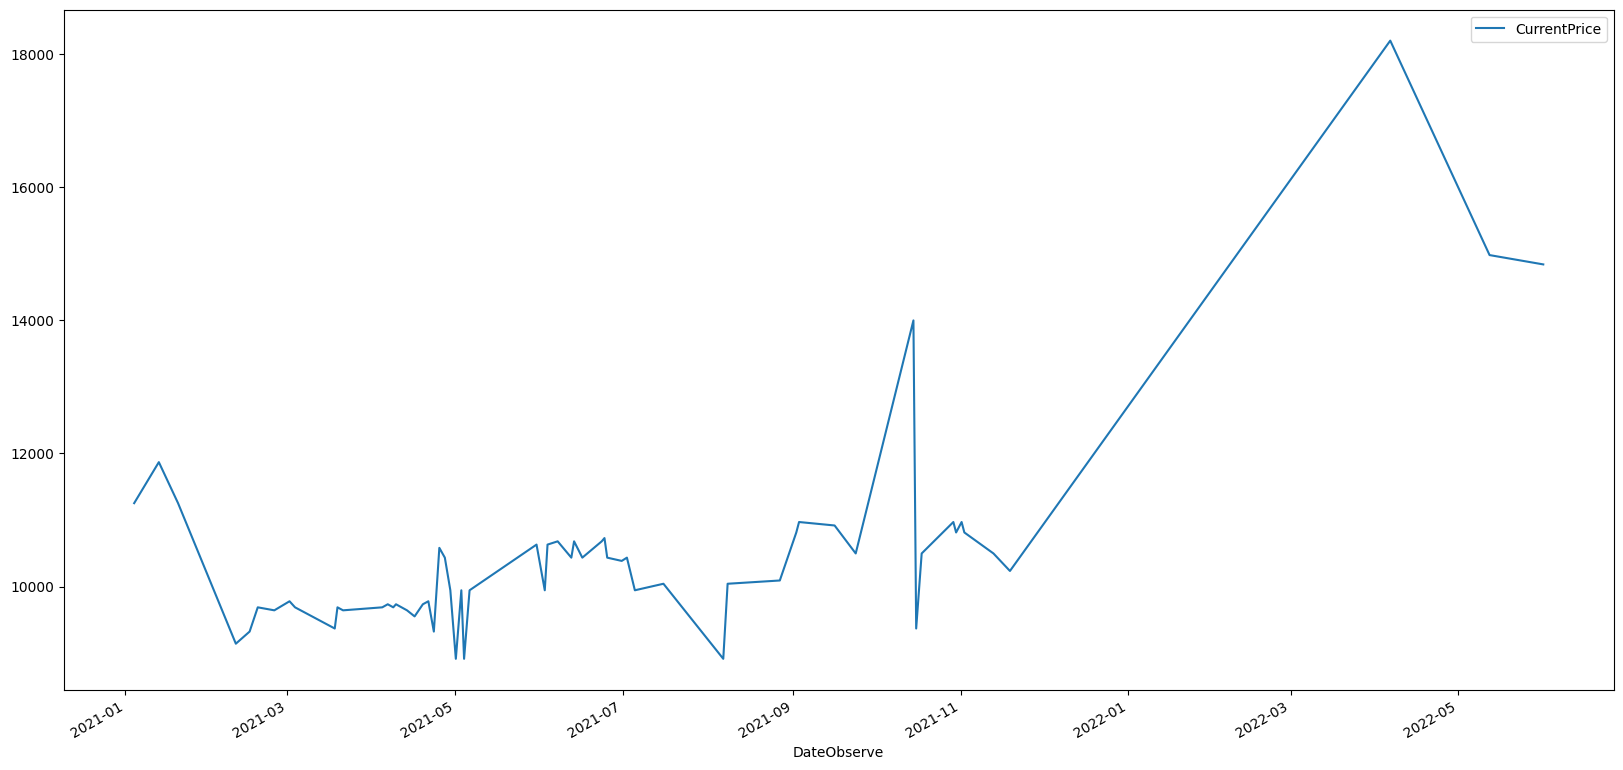

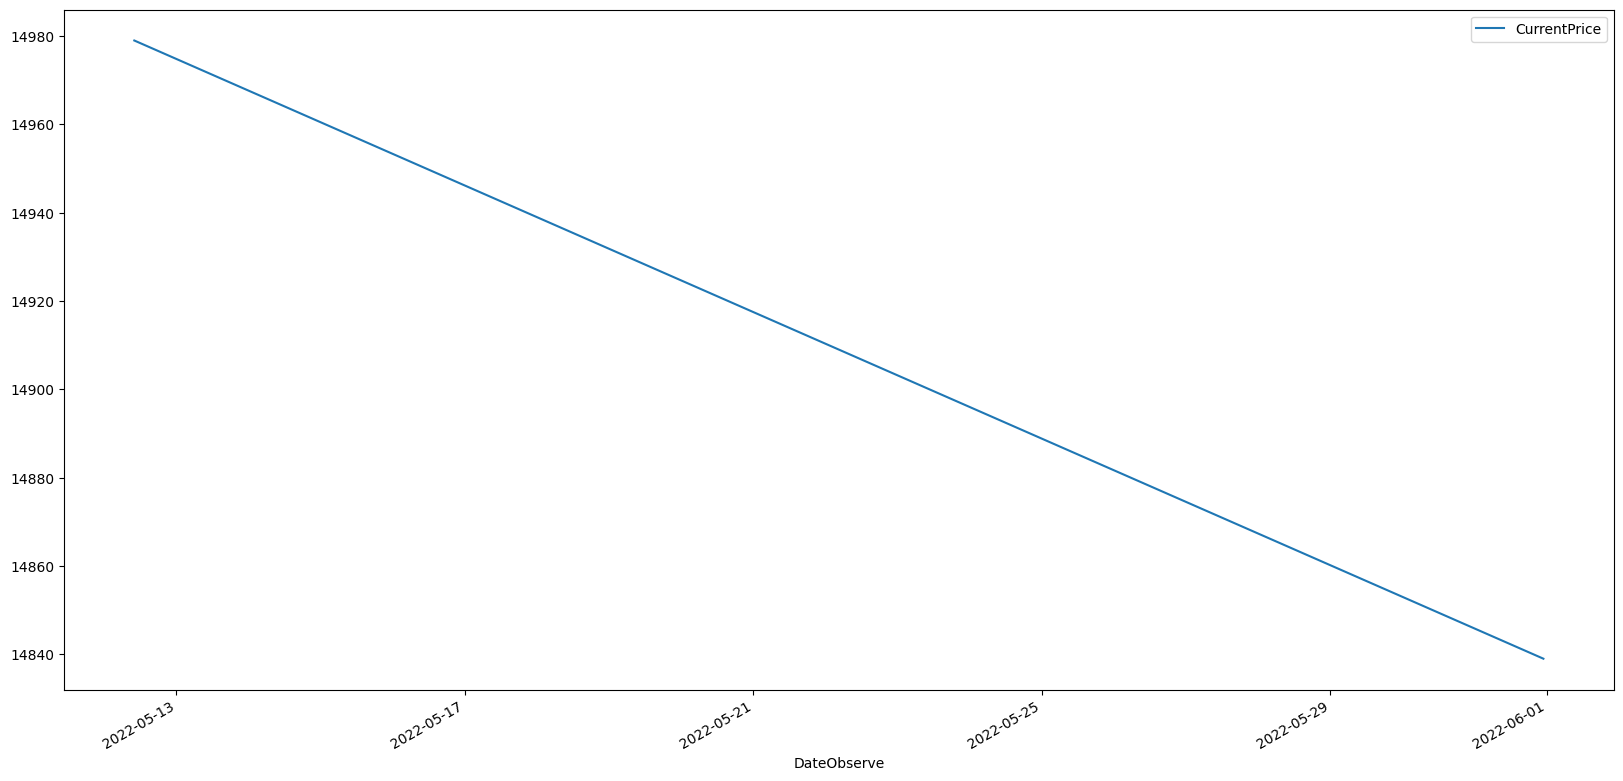

In [ ]:
# plot df and d
df_taken.plot(x="DateObserve", y=["CurrentPrice"], figsize=(20,10))
d.plot(x="DateObserve", y=["CurrentPrice"], figsize=(20,10))


In [ ]:
df_db.shape

(2710456, 4)

In [20]:
len(df_db["WebPriceId"].unique())

32905

In [33]:
def get_time_series_by_webpriceid(df, webpriceid):
    # Get time series for specified webpriceid
    # Input: df - dataframe with DateObserve column
    #        webpriceid - id of the item
    # Output: df - dataframe with calculated npc values
    df_taken = df.loc[df["WebPriceId"] == webpriceid].copy()
    df_taken['npc'] = df_taken["CurrentPrice"] / df_taken["CurrentPrice"].shift(1) - 1
    df_taken.dropna(inplace=True)
    return df_taken

def get_last_n_days(df, n=30):
    # Get last n days
    # Input: df - dataframe with DateObserve column
    #        n - number of days to get
    # Output: df - dataframe with last n days
    if n ==0:
        return df.copy()
    return df.loc[df["DateObserve"] >= df["DateObserve"].max() - pd.Timedelta(days=n)].copy()


def arima_predict_next_series(series, field_to_predict="npc", n=30):
    # Predict npc for the last day in the series based on the last n days
    # Input: df - dataframe with DateObserve column
    #        field_to_predict - field to predict
    #        n - number of days to use for prediction
    # Output: yhat - predicted value
    #         model - trained model
    #         d - dataframe with last n days
    #         df - dataframe with last n days
    # Get last n days
    # If n == 0, use all available data
    if n == 0:
        d = series.copy()
    else:
        d = get_last_n_days(series, n)
    # Set DateObserve as index
    d = d.drop(columns=["WebPriceId", "StockStatus"])
    d = d.reset_index()
    # Train AutoReg model
    model = (ARIMA(d[field_to_predict])).fit()
    # Make prediction
    yhat = model.predict(len(d), len(d))
    difference_with_last = yhat - d[field_to_predict].iloc[-1]
    return yhat.iloc[0], model, d, series, difference_with_last.iloc[0]


def predict_npc_arima_for_item(df_db: pd.DataFrame, webpriceid: int, field_to_predict="npc", n=30):
    yhat, model, d, series, diff = arima_predict_next_series(get_time_series_by_webpriceid(df_db, webpriceid), field_to_predict="npc", n=30)
    return yhat, model, d, series, diff


def predict_npc_for_list_of_items(df_db: pd.DataFrame, webpriceids: list, field_to_predict="npc", n=30):
    # Predict npc for every unique item in the dataframe
    # Input: df - dataframe with DateObserve column
    #        field_to_predict - field to predict
    #        n - number of days to use for prediction
    # Output: df - dataframe with predictions
    #         df_predictions - dataframe with predictions
    i = 0
    df_predictions = []
    for webpriceid in webpriceids:
        try:
            yhat, model, d, series, diff = predict_npc_arima_for_item(df_db, webpriceid, field_to_predict, n=30)
            df_predictions.append({"WebPriceId": webpriceid, "npc": yhat, "diff": diff, "price": series["CurrentPrice"].iloc[-1] * (1 + yhat)})
        except:
            print(f"Error for webpriceid {webpriceid}")
            i += 1
    print (f"Number of errors: {i}")
    return pd.DataFrame(df_predictions)



def return_npc_mean(df) -> float:
    # Return mean npc value
    # Input: df - dataframe with npc column
    # Output: mean npc value
    return df["npc"].mean()

In [34]:
# Load y_train
def read_xlsx(path):
    df = pd.read_excel(path, engine='openpyxl')
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])
    # drop index
    df = df.reset_index(drop=True)

    return df

# read data
df_y_train = read_xlsx(f"{DATA_ROOT_FOLDER}/raw/Y_train.xlsx")
df_y_train.head()


"ИПЦ, мом",Период,Целевой показатель
0,2020-06-01 00:00:00,0.28
1,2020-07-01 00:00:00,-0.065
2,2020-08-01 00:00:00,-0.005
3,2020-09-01 00:00:00,0.315
4,2020-10-01 00:00:00,0


In [35]:

import warnings

unique_webpriceids = df_db["WebPriceId"].unique()
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    df_predictions = predict_npc_for_list_of_items(df_db, unique_webpriceids[:4000], field_to_predict="npc", n=30)
df_predictions.drop(columns=["diff"], inplace=True)
npc_for_next_month = df_predictions["npc"].mean()


Error for webpriceid 543
Error for webpriceid 1472
Error for webpriceid 1976
Error for webpriceid 2462
Error for webpriceid 2830
Error for webpriceid 3154
Error for webpriceid 3771
Error for webpriceid 3778
Error for webpriceid 3891
Error for webpriceid 3933
Error for webpriceid 3971
Error for webpriceid 4559
Error for webpriceid 5104
Error for webpriceid 7020
Error for webpriceid 7443
Error for webpriceid 8035
Error for webpriceid 8055
Error for webpriceid 8065
Error for webpriceid 8066
Error for webpriceid 8070
Error for webpriceid 8080
Error for webpriceid 8094
Error for webpriceid 8112
Error for webpriceid 8118
Error for webpriceid 8124
Error for webpriceid 8134
Error for webpriceid 8164
Error for webpriceid 8314
Error for webpriceid 8375
Error for webpriceid 8390
Error for webpriceid 8392
Error for webpriceid 8393
Error for webpriceid 8398
Error for webpriceid 8413
Error for webpriceid 8415
Error for webpriceid 8416
Error for webpriceid 8423
Error for webpriceid 8682
Error for web

In [40]:
df_y_train

"ИПЦ, мом",Период,Целевой показатель
0,2020-06-01 00:00:00,0.28
1,2020-07-01 00:00:00,-0.065
2,2020-08-01 00:00:00,-0.005
3,2020-09-01 00:00:00,0.315
4,2020-10-01 00:00:00,0
5,2020-11-01 00:00:00,0.375
6,2020-12-01 00:00:00,0.35
7,2021-01-01 00:00:00,0.38
8,2021-02-01 00:00:00,0.685
9,2021-03-01 00:00:00,0.255


In [39]:
print(npc_for_next_month*30)
print(npc_for_next_month*30 - df_y_train.iloc[0]["Целевой показатель"])

0.5745848011260825
-0.9854151988739176


In [ ]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WebPriceId  10 non-null     int64  
 1   npc         10 non-null     float64
 2   diff        10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 368.0 bytes


In [ ]:
df_db

,WebPriceId,DateObserve,StockStatus,CurrentPrice,npc
0,112,2021-01-12 07:38:39.433,InStock,574.0,NaN
1,112,2021-01-19 18:45:36.000,InStock,643.0,NaN
2,112,2021-01-25 18:39:09.000,InStock,603.0,0.050523
3,112,2021-01-28 10:46:26.487,InStock,608.0,-0.054432
4,112,2021-02-01 18:56:03.000,InStock,597.0,-0.009950
...,...,...,...,...,...
2839790,9991967,2022-05-27 16:49:12.397,InStock,1449.0,-0.000690
2839791,9991967,2022-05-30 20:22:02.337,InStock,1247.0,-0.195484
2839792,9991967,2022-05-30 23:28:53.980,InStock,1347.0,-0.070393
2839793,9991967,2022-05-31 11:18:15.217,InStock,1646.0,0.319968
